In [15]:
#Importing required libs 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Read the health data set using pandas lib 
health_data = pd.read_csv ("healthcare_dataset.csv", sep =",")

# Remove all the duplicates from our data set 
health_data = health_data.drop_duplicates()

# Remove rows with null value 
health_data = health_data.dropna()

# Length of our data set 
print(f"Length of our data set is {len(health_data)}")

# Check if there are any null values in the dataset after cleaning

has_nan = health_data.isna().any().any()

if has_nan:
    print("There are null values in the Dataset.")
else:
    print("There are no null values in the Dataset.")

Length of our data set is 54966
There are no null values in the Dataset.


In [18]:
health_data.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


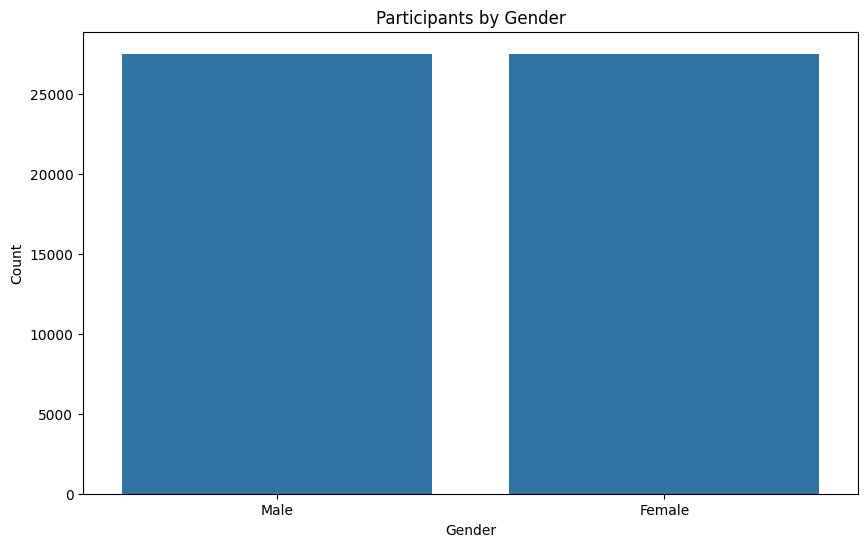

In [19]:
# Plot of pariticpants by gender in our dataset 
plt.figure(figsize=(10, 6))
sns.countplot(x=health_data['Gender'], data=health_data)
plt.title('Participants by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

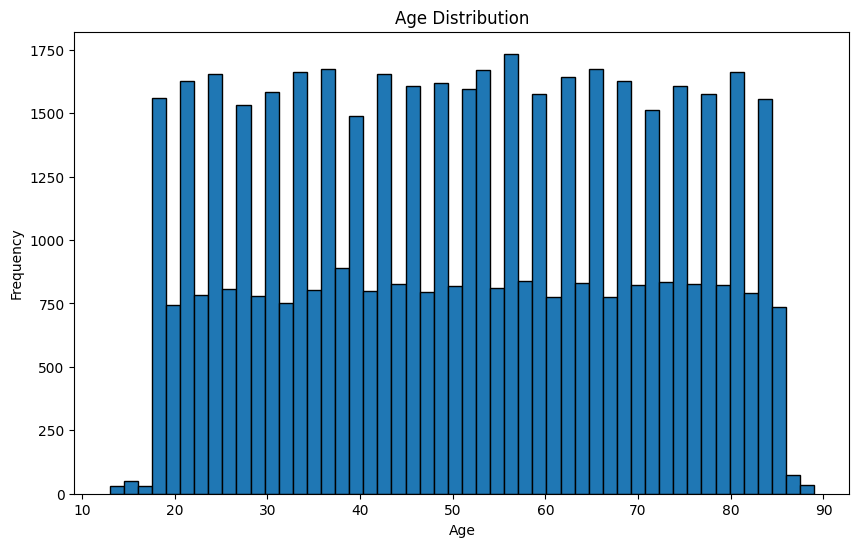

In [25]:
# Distribution of participant age in our dataset
plt.figure(figsize=(10, 6))
plt.hist(health_data['Age'], bins=50, edgecolor='black')  # Adjust number of bins as needed
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

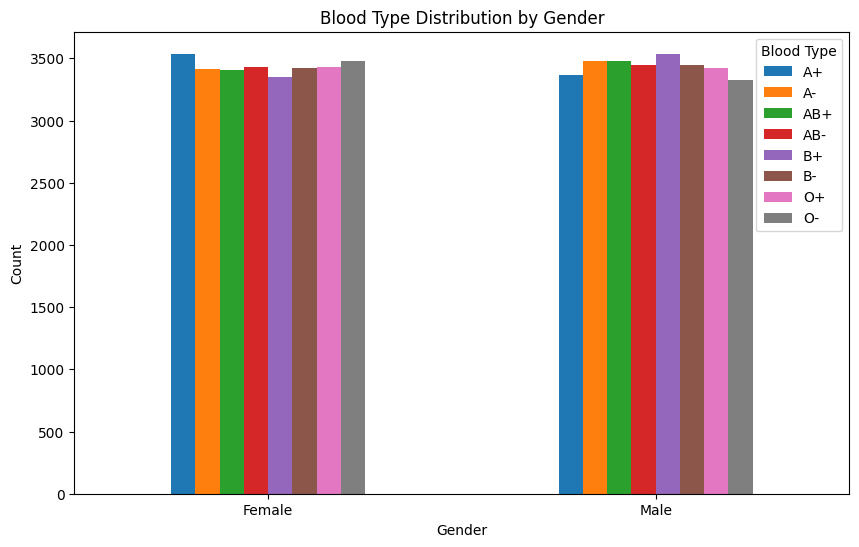

In [21]:
# Group by 'gender' and 'blood_type'
grouped = health_data.groupby(['Gender', 'Blood Type']).size().unstack()

# Plotting the grouped bar plot
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Blood Type Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.legend(title='Blood Type')
plt.show()

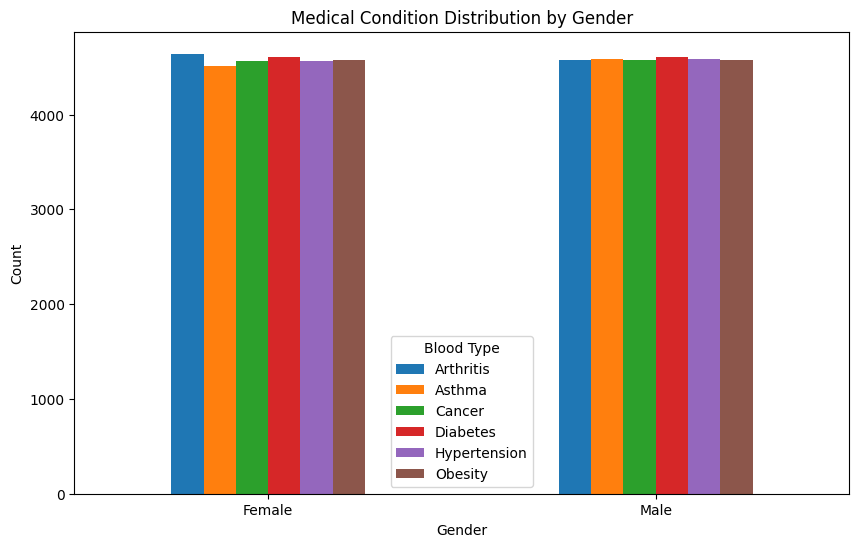

In [22]:
# Group by 'gender' and 'Medical Condition'
grouped = health_data.groupby(['Gender', 'Medical Condition']).size().unstack()

# Plotting the grouped bar plot
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Medical Condition Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.legend(title='Blood Type')
plt.show()

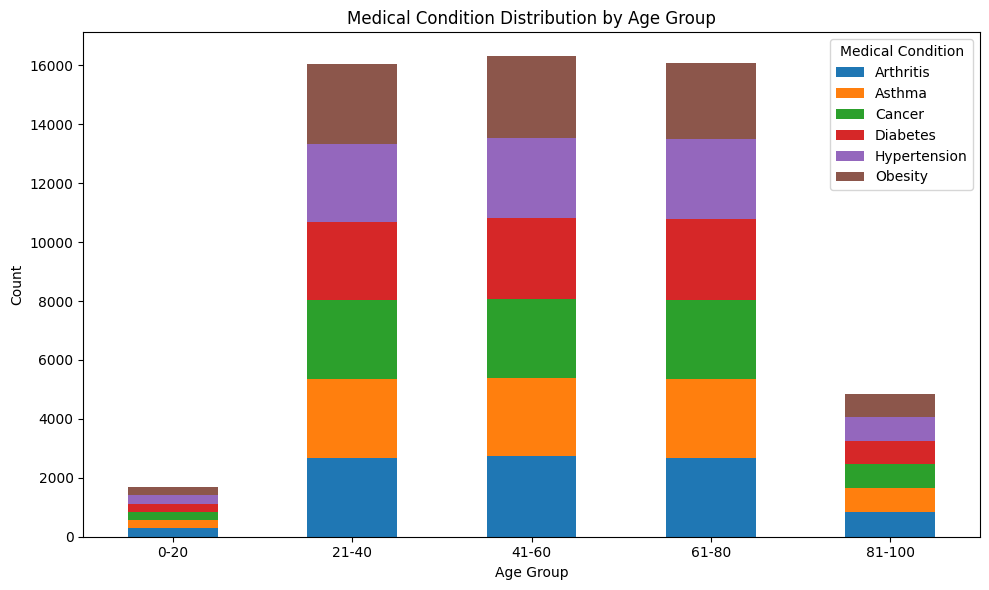

In [23]:
# Here we define age groups
age_bins = [0, 20, 40, 60, 80, 100] 

# Lables for the above age groups 
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Categorize ages into groups 
health_data['Age Group'] = pd.cut(health_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by 'Age Group' and 'Medical Condition', then count occurrences
grouped = health_data.groupby(['Age Group', 'Medical Condition'], observed=False).size().unstack().fillna(0)

# Plotting the stacked bar plot
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Medical Condition Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Medical Condition', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()